In [109]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy

print('python: {}'.format(sys.version))
print('numpy: {}'.format(numpy.__version__))
print('pandas: {}'.format(pandas.__version__))
print('seaborn: {}'.format(seaborn.__version__))
print('matplotlib:{}'.format(matplotlib.__version__))


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
numpy: 1.16.2
pandas: 0.24.2
seaborn: 0.10.1
matplotlib:3.1.3


In [110]:
#loading data from csv file
data = pandas.read_csv('creditcard.csv')

In [111]:
#explore data
print(data.columns)
print('(numberoftransactions, numberofparametersforeachtransactions):{}'.format(data.shape))
print('Description of data:')
print(data.describe())
#in class column 
#1 represents fraudulent cases; 0 represents valid cases; 
#since mean is 0.001727 (nearer to zero) that means we have more valid cases than fraudulent cases 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(numberoftransactions, numberofparametersforeachtransactions):(284807, 31)
Description of data:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   

In [112]:
#we will cut down our training set to 10% of above set
data = data.sample(frac = 0.3, random_state = 1)

print(data.shape)

(85442, 31)


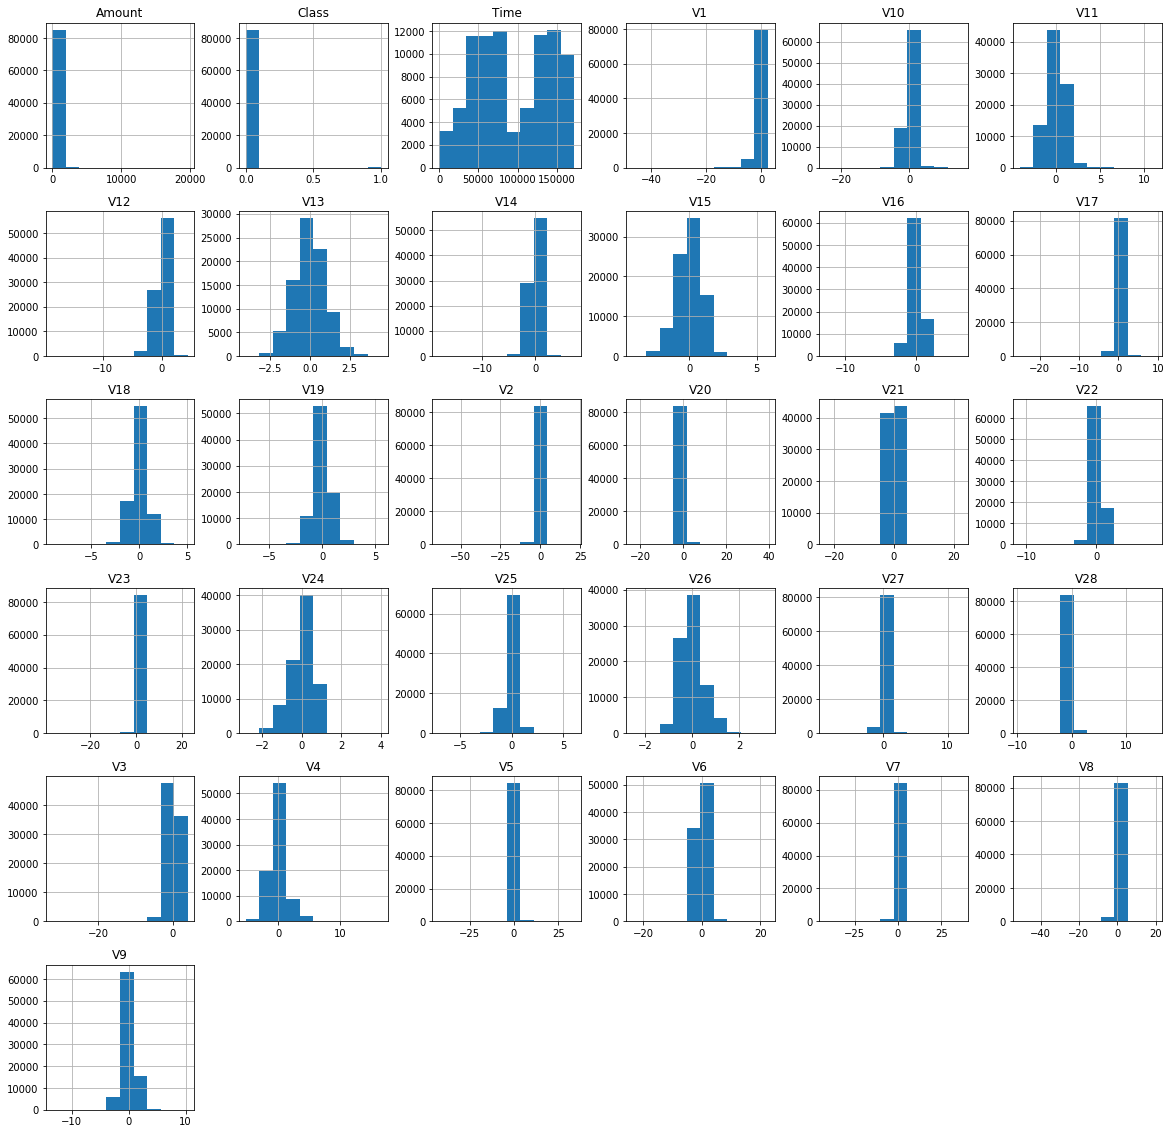

In [113]:
#visualising data:plot histogram of each parameter
data.hist(figsize = (20,20))
matplotlib.pyplot.show()
#we see that most of the histograms are centered at zero
#again we see in Class hist. that valid transactions >>> fraudulent transactions


In [114]:
#determine number of fraud / valid cases
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]
#fraud ratio to valid
outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)
print('Fraud cases: {}'.format(len(Fraud)))
print('Valid cases: {}'.format(len(Valid)))

0.001582519605659559
Fraud cases: 135
Valid cases: 85307


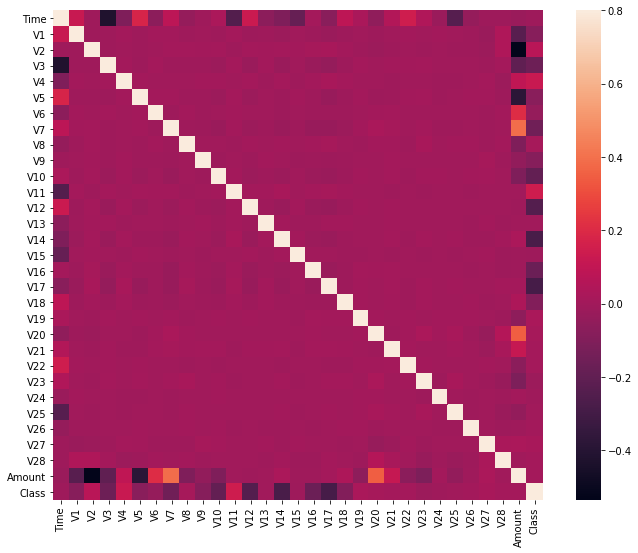

In [115]:
#Correlation Matrix : linear relations b/w features
corrmat = data.corr();
fig = matplotlib.pyplot.figure(figsize = (12, 9))
#to turn Correlation Matrixinto a more understandable display (using seaborn)
seaborn.heatmap(corrmat, vmax = 0.8, square = True)
matplotlib.pyplot.show()

In [116]:
#get all columns from data frame
columns = data.columns.tolist()
#filter out columns to remove data we do not want. 
columns = [c for c in columns if c not in ["Class"]]
#Store the variable we'll be predicting on 
target = "Class"

X = data[columns]
Y = data[target]

#print shapes of X and Y
print(X.shape)
print(Y.shape)

(85442, 30)
(85442,)


In [117]:
#detecting outliers 
#we'll use metrics to detect our accuracy of how successfull our detection is
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
#define a random state
state = 1
#define the outlier detection methods using a dictionary
classifiers = {
    "Isolation Forest":IsolationForest(max_samples=len(X),
                                      contamination = outlier_fraction,
                                      random_state = state),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors = 20,
                                             contamination = outlier_fraction)
}
#contamination holds the value of "number of outliers we think there are"

In [118]:
#Fit the model
n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate (classifiers.items()):
    #fir the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != Y).sum()
    
#Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y, y_pred))


C:\Users\rajesh jain\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 191
0.9977645654362023
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.29      0.30      0.30       135

   micro avg       1.00      1.00      1.00     85442
   macro avg       0.65      0.65      0.65     85442
weighted avg       1.00      1.00      1.00     85442

Local Outlier Factor: 263
0.9969218885325718
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.03      0.03      0.03       135

   micro avg       1.00      1.00      1.00     85442
   macro avg       0.51      0.51      0.51     85442
weighted avg       1.00      1.00      1.00     85442

